In [15]:
import project1 as p1
import utils
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

print('ok')

ok


In [16]:
#-------------------------------------------------------------------------------
# Data loading. There is no need to edit code in this section.
#-------------------------------------------------------------------------------

base_folder = 'c:/Users/DVD/Desktop/edX/MIT 6.86x/project1/sentiment_analysis/'

train_data = utils.load_data(base_folder + 'reviews_train.tsv')
val_data = utils.load_data(base_folder + 'reviews_val.tsv')
test_data = utils.load_data(base_folder + 'reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

print('ok')

ok


In [17]:
# df = pd.read_csv('reviews_train.tsv',encoding='ISO-8859-1',sep='\t')
# df.head()
# print(df)

# profile = ProfileReport(df,title='reviews_train.tsv')
# profile.to_widgets() # Widget report
# profile.to_notebook_iframe() # HTML report

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


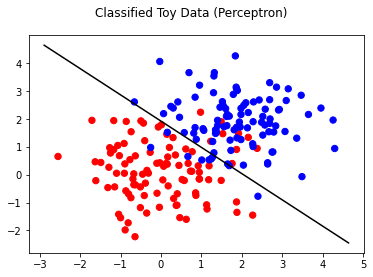

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


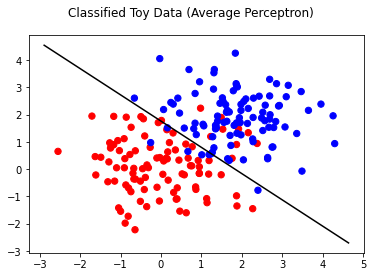

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


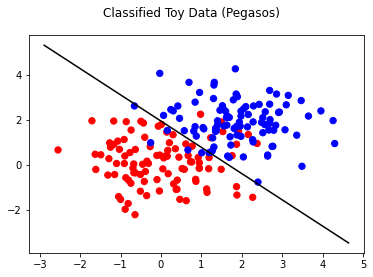

In [18]:
#-------------------------------------------------------------------------------
# Problem 5
#-------------------------------------------------------------------------------

toy_features, toy_labels = toy_data = utils.load_toy_data(base_folder+'toy_data.tsv')

T = 10
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

In [19]:
#-------------------------------------------------------------------------------
# Problem 7
#-------------------------------------------------------------------------------

T = 10
L = 0.01

pct_train_accuracy, pct_val_accuracy = \
   p1.classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

avg_pct_train_accuracy, avg_pct_val_accuracy = \
   p1.classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

avg_peg_train_accuracy, avg_peg_val_accuracy = \
   p1.classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for perceptron:   0.8157
Validation accuracy for perceptron: 0.7160
Training accuracy for average perceptron:   0.9728
Validation accuracy for average perceptron: 0.7980
Training accuracy for Pegasos:                     0.9143
Validation accuracy for Pegasos:                   0.7900


In [20]:
#-------------------------------------------------------------------------------
# Problem 8
#-------------------------------------------------------------------------------

# data = (train_bow_features, train_labels, val_bow_features, val_labels)

# # values of T and lambda to try
# Ts = [1, 5, 10, 15, 25, 50]
# Ls = [0.001, 0.01, 0.1, 1, 10]

# pct_tune_results = utils.tune_perceptron(Ts, *data)
# print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
# print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

# avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
# print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
# print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# # fix values for L and T while tuning Pegasos T and L, respective
# fix_L = 0.01
# peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
# print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
# print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

# fix_T = Ts[np.argmax(peg_tune_results_T[1])]
# peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
# print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
# print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

# utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
# utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
# utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
# utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)



In [21]:
theta, theta_0 = p1.pegasos(train_bow_features,train_labels,25,0.01)
pred_labels = p1.classify(test_bow_features,theta,theta_0)
output = p1.accuracy(pred_labels,test_labels)

# print('pred_labels: ',pred_labels, '\ntest_labels: ',test_labels)

# output = p1.classifier_accuracy(p1.pegasos,test_bow_features,val_bow_features,test_labels,val_labels,T=25,L=0.01)

# print('theta, theta_0:',theta, theta_0)
print('accuracy on the test set:',output)

#-------------------------------------------------------------------------------
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.
#-------------------------------------------------------------------------------

best_theta = theta # Your code here
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

accuracy on the test set: 0.802
Most Explanatory Word Features
['delicious', 'great', '!', 'best', 'perfect', 'loves', 'wonderful', 'glad', 'love', 'quickly']
